##### Información del conjunto de datos:

##### Esta investigación se centró en el caso de los pagos por defecto de los clientes de Banco Uno y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos.
##### De la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la estimación La probabilidad de incumplimiento será más valiosa que el resultado binario de la clasificación de Clientes creíbles o no creíbles.

##### Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presentó el novedoso método de clasificación de suavizado para estimar la probabilidad real de defecto. Con la probabilidad real de incumplimiento como variable de respuesta (Y), y la probabilidad predictiva de incumplimiento como la variable independiente (X), la simple lineal El resultado de la regresión (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercano a cero y coeficiente de regresión (B) a uno. Por lo tanto, entre los seis datos de minería técnicas, la red neuronal artificial es la única que puede estimar con precisión el valor real probabilidad de incumplimiento.

##### Información de los atributos:

##### NOTA: La siguiente es información actualizada del autor de la fuente.

##### Esta investigación empleó una variable binaria, pago predeterminado (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

##### X1: Monto del crédito otorgado (dólar NT): incluye tanto al consumidor individual crédito y su crédito familiar (complementario).

##### X2: Género (1 = masculino; 2 = femenino).

##### X3: Educación (1 = posgrado; 2 = universidad; 3 = bachillerato; 0, 4, 5, 6 = otros).

##### X4: Estado civil (1 = casado; 2 = soltero; 3 = divorciado; 0 = otros).

##### X5: Edad (año).

##### X6 - X11: Historial de pagos pasados. Realizamos un seguimiento de los últimos registros de pagos mensuales (desde Abril a septiembre de 2005) de la siguiente manera: X6 = el estado de reembolso en septiembre de 2005; X7 = el estado de reembolso en agosto de 2005; . . .; X11 = el estado de reembolso en abril de 2005.

##### La escala de medición para el estado de reembolso es:

##### 2: Sin consumo; -1: pagado en su totalidad; 0: El uso de crédito renovable; 1 = retraso en el pago por un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
 

#####  X12-X17: Monto del extracto de la factura (dólar NT). X12 = monto del extracto de la factura en Septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = cantidad de estado de cuenta en abril de 2005.

#####  X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre, 2005; X19 = monto pagado en agosto de 2005; . . .; X23 = monto pagado en abril de 2005.

##### Y: comportamiento del cliente; Y = 0 entonces no predeterminado, Y = 1 luego predeterminado 

# Importando librerías

In [87]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import pymysql
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport

import shap

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from catboost import Pool
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)

# Cargamos los datos

In [88]:
df = pd.read_csv("bank.csv")

# Revisando los datos

In [72]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

# Modificando tipo de datos

In [5]:
df = df.astype({"LIMIT_BAL":'float64', "AGE":'int64',"MARRIAGE":'int64',"PAY_0":'float64',"PAY_2":'float64',"PAY_3":'float64',
               "PAY_4":'float64',"PAY_5":'float64',"PAY_6":'float64',"BILL_AMT1":"float64","BILL_AMT2":"float64","BILL_AMT3":"float64","BILL_AMT4":"float64","BILL_AMT5":"float64",
                "BILL_AMT6":"float64","PAY_AMT1":"float64","PAY_AMT2":"float64","PAY_AMT3":"float64","PAY_AMT4":"float64","PAY_AMT5":"float64","PAY_AMT6":"float64","default.payment.next.month":"int64"}) 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
df.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Pago_Predeterminado'}, inplace = True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pago_Predeterminado
0,20000.0,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Eliminando Duplicados

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [9]:
df = df.drop_duplicates()
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pago_Predeterminado
0,20000.0,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Eliminando las filas con datos faltantes.

In [10]:
df.isnull().sum().sort_values(ascending=False)

LIMIT_BAL              0
SEX                    0
PAY_AMT6               0
PAY_AMT5               0
PAY_AMT4               0
PAY_AMT3               0
PAY_AMT2               0
PAY_AMT1               0
BILL_AMT6              0
BILL_AMT5              0
BILL_AMT4              0
BILL_AMT3              0
BILL_AMT2              0
BILL_AMT1              0
PAY_6                  0
PAY_5                  0
PAY_4                  0
PAY_3                  0
PAY_2                  0
PAY_1                  0
AGE                    0
MARRIAGE               0
EDUCATION              0
Pago_Predeterminado    0
dtype: int64

# Exploración de los datos

### comprobar si falta algún dato

In [11]:
total = df.isnull().sum().sort_values(ascending = False)
percentaje = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percentaje], axis=1, keys=['Total', 'Porcentaje']).transpose()

,LIMIT_BAL,SEX,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_1,AGE,MARRIAGE,EDUCATION,Pago_Predeterminado
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Porcentaje,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_1,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


In [13]:
df.shape

(29965, 24)

#### No faltan datos en todo el conjunto de datos.

## Agrupando datos por el valor de una columna

In [14]:
df[['LIMIT_BAL', 'EDUCATION']].groupby(['EDUCATION']).mean()

,LIMIT_BAL
EDUCATION,
0,217142.857143
1,212903.531194
2,147060.132677
3,126552.935910
4,220894.308943
5,168164.285714
6,148235.294118


In [15]:
df[['LIMIT_BAL', 'EDUCATION']].groupby(['EDUCATION']).mean().sort_values(by = ['LIMIT_BAL'])

,LIMIT_BAL
EDUCATION,
3,126552.935910
2,147060.132677
6,148235.294118
5,168164.285714
1,212903.531194
0,217142.857143
4,220894.308943


In [16]:
df[['LIMIT_BAL', 'EDUCATION', 'SEX']].groupby(['EDUCATION', 'SEX']).mean()

LIMIT_BAL
EDUCATION SEX               
0         1    212500.000000
          2    223333.333333
1         1    219123.331799
          2    208555.573428
2         1    133869.225037
          2    155245.173968
3         1    120943.557789
          2    130369.230769
4         1    197142.857143
          2    233209.876543
5         1    159221.052632
          2    172756.756757
6         1    157200.000000
          2    139615.384615

In [17]:
df[['LIMIT_BAL', 'EDUCATION', 'SEX']].groupby(['EDUCATION', 'SEX']).mean().sort_values(by = ['LIMIT_BAL'], ascending = False)

LIMIT_BAL
EDUCATION SEX               
4         2    233209.876543
0         2    223333.333333
1         1    219123.331799
0         1    212500.000000
1         2    208555.573428
4         1    197142.857143
5         2    172756.756757
          1    159221.052632
6         1    157200.000000
2         2    155245.173968
6         2    139615.384615
2         1    133869.225037
3         2    130369.230769
          1    120943.557789

In [18]:
df['LIMIT_BAL'].value_counts().head(5)

50000.0     3363
20000.0     1975
30000.0     1610
80000.0     1564
200000.0    1524
Name: LIMIT_BAL, dtype: int64

In [19]:
df['AGE'].value_counts().head(5)

29    1602
27    1475
28    1406
30    1394
26    1252
Name: AGE, dtype: int64

In [20]:
df['SEX'].value_counts().head(5)

2    18091
1    11874
Name: SEX, dtype: int64

## Analisis de variables

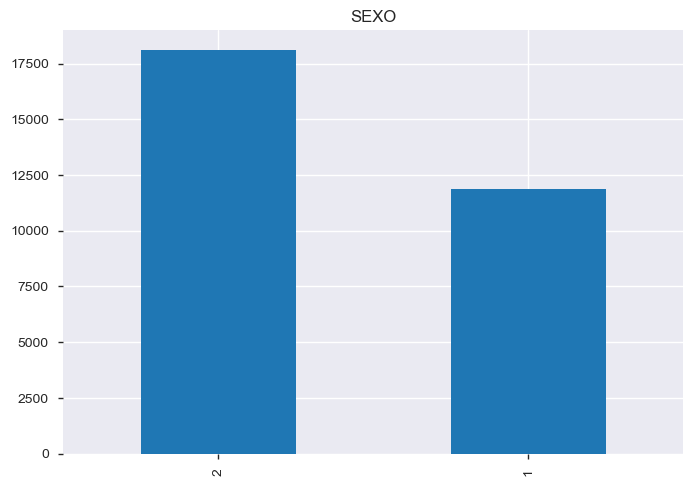

In [21]:
plot = df['SEX'].value_counts().plot(kind='bar',title='SEXO')

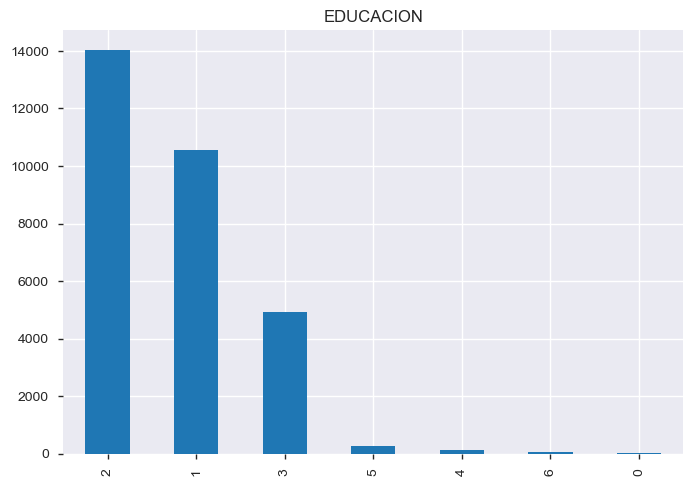

In [22]:
plot = df['EDUCATION'].value_counts().plot(kind='bar',title='EDUCACION')

In [23]:
df['Pago_Predeterminado'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  Pago_Predeterminado
0          0                      1.000000
1          0                      0.807630
           1                      0.192370
2          0                      0.762608
           1                      0.237392
3          0                      0.748321
           1                      0.251679
4          0                      0.943089
           1                      0.056911
5          0                      0.935714
           1                      0.064286
6          0                      0.843137
           1                      0.156863
Name: Pago_Predeterminado, dtype: float64

In [24]:
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(4,5)

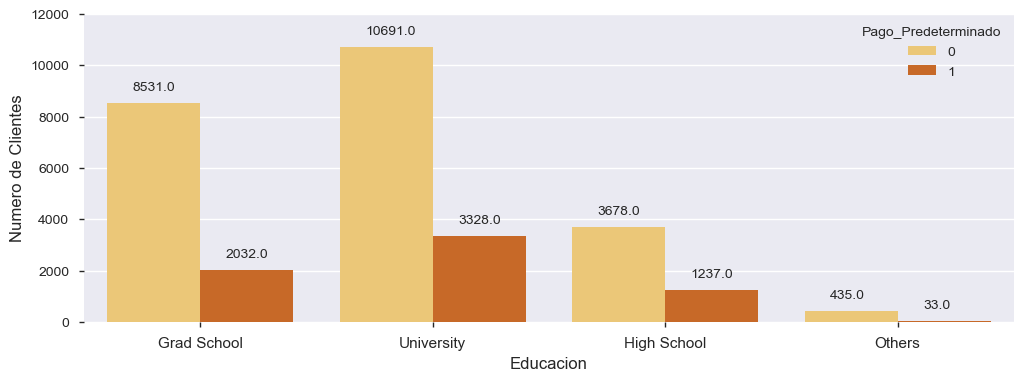

In [25]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Pago_Predeterminado", palette = 'YlOrBr')

plt.xlabel("Educacion", fontsize= 12)
plt.ylabel("Numero de Clientes", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

In [26]:
df['Pago_Predeterminado'].groupby(df['SEX']).value_counts(normalize = True)

SEX  Pago_Predeterminado
1    0                      0.758380
     1                      0.241620
2    0                      0.792107
     1                      0.207893
Name: Pago_Predeterminado, dtype: float64

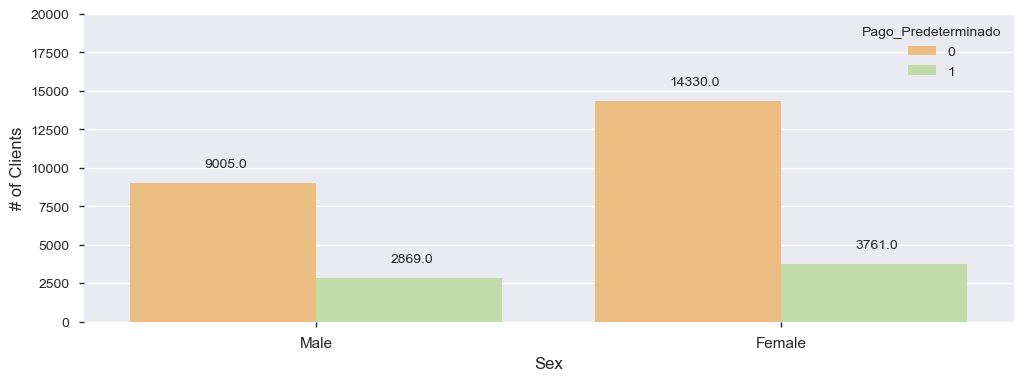

In [27]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Pago_Predeterminado", palette = 'Spectral')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

## Verificando si existe Correlacion

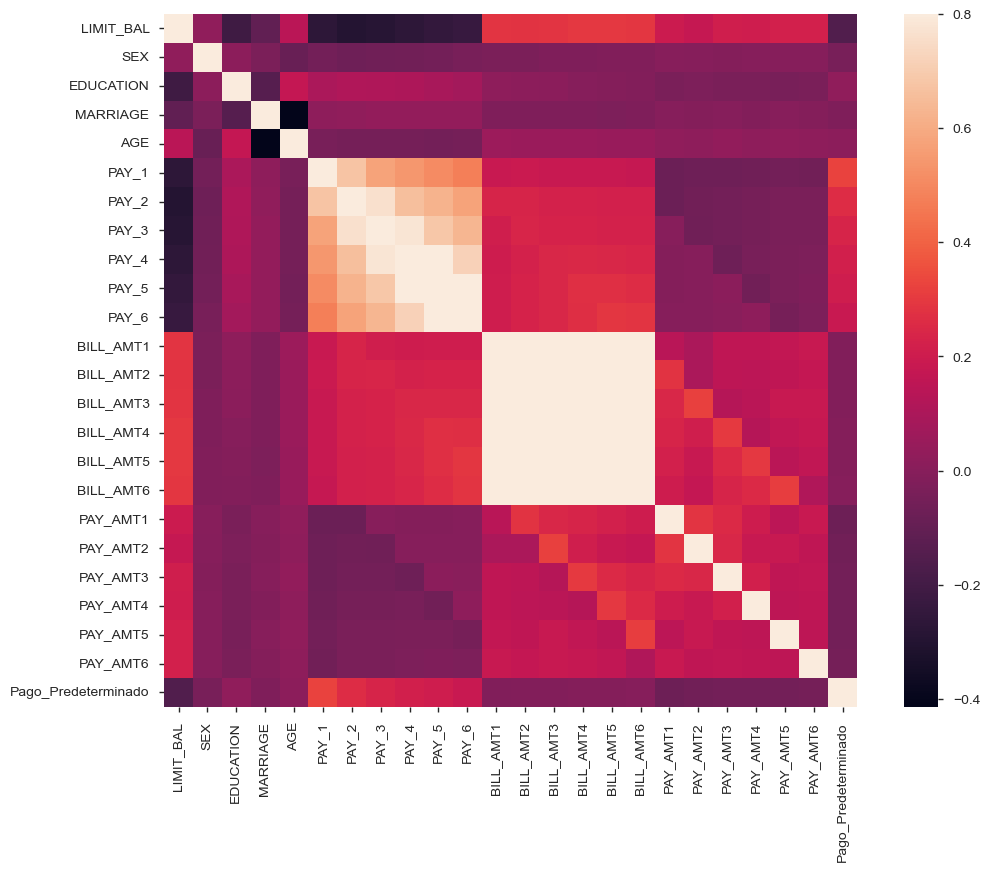

In [28]:
#corr = df.set_index('LIMIT_BAL').corr()
#sm.graphics.plot_corr(corr, xnames=list(corr.columns))
#plt.show()

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

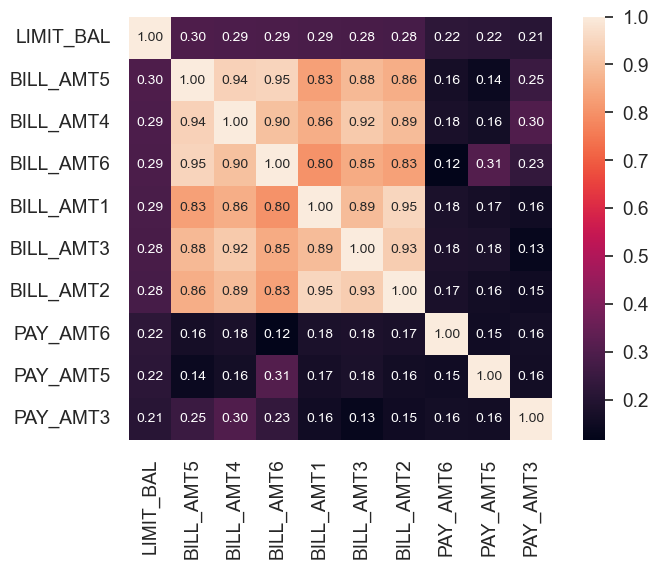

In [29]:
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'LIMIT_BAL')['LIMIT_BAL'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

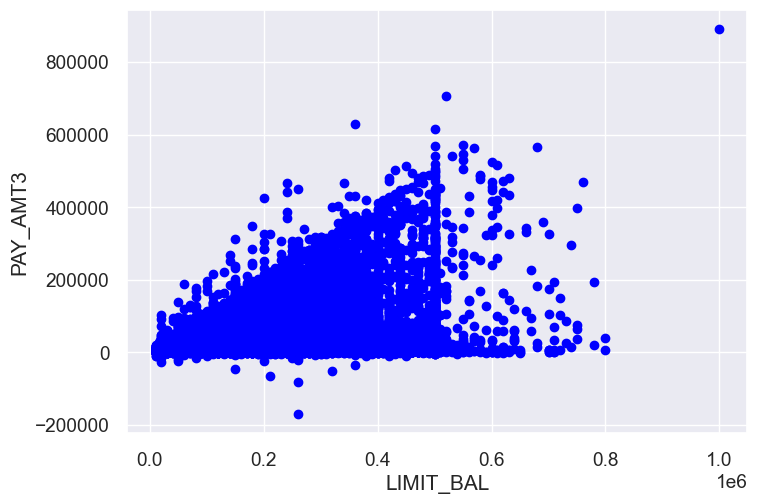

In [30]:
plt.scatter(df.LIMIT_BAL, df.BILL_AMT4, color='blue')
plt.xlabel("LIMIT_BAL")
plt.ylabel("PAY_AMT3")
plt.show()

In [31]:
Total_mes_df = df[['BILL_AMT4','BILL_AMT5','BILL_AMT3','BILL_AMT1','BILL_AMT2','BILL_AMT6']]

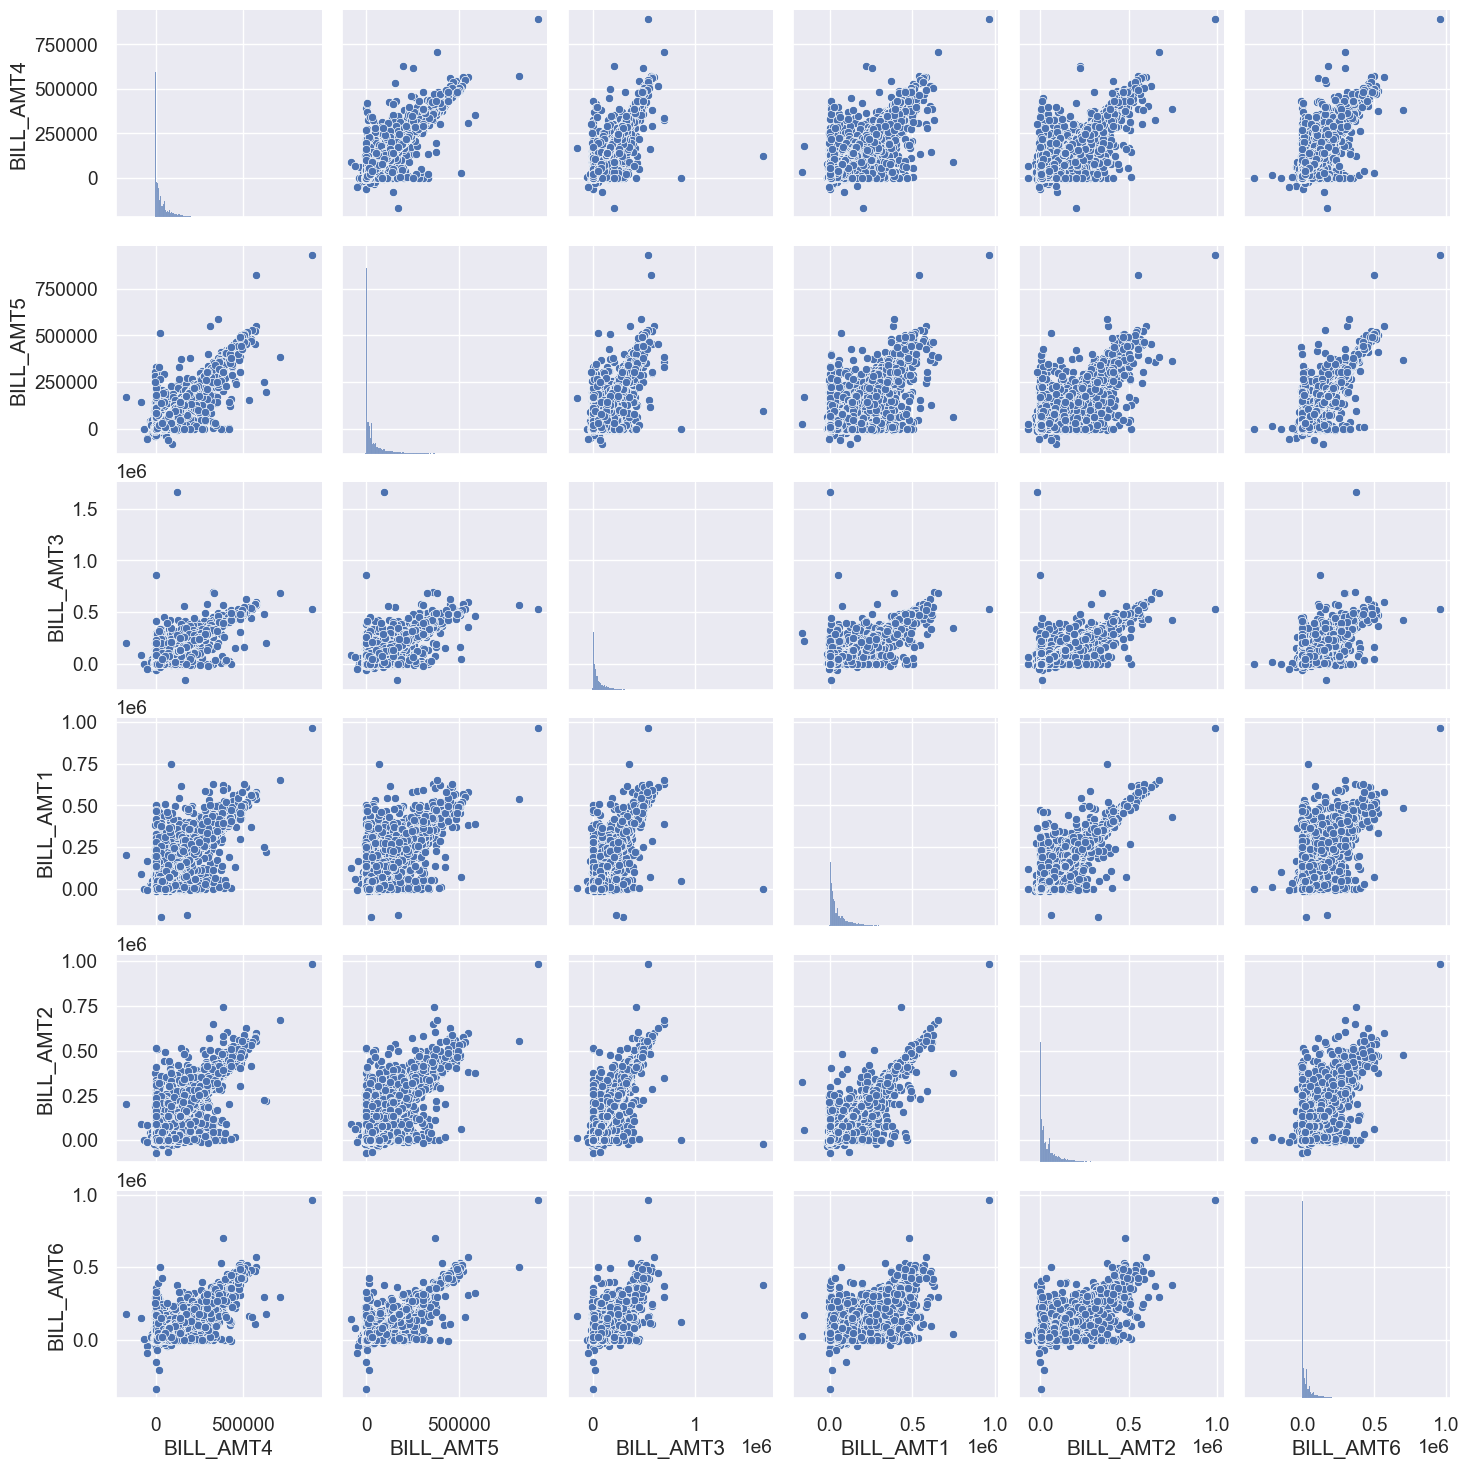

In [32]:
sns.pairplot(data = Total_mes_df)

In [33]:
Total_pago_df = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4','PAY_AMT3','PAY_AMT2','PAY_AMT1', 'Pago_Predeterminado']]

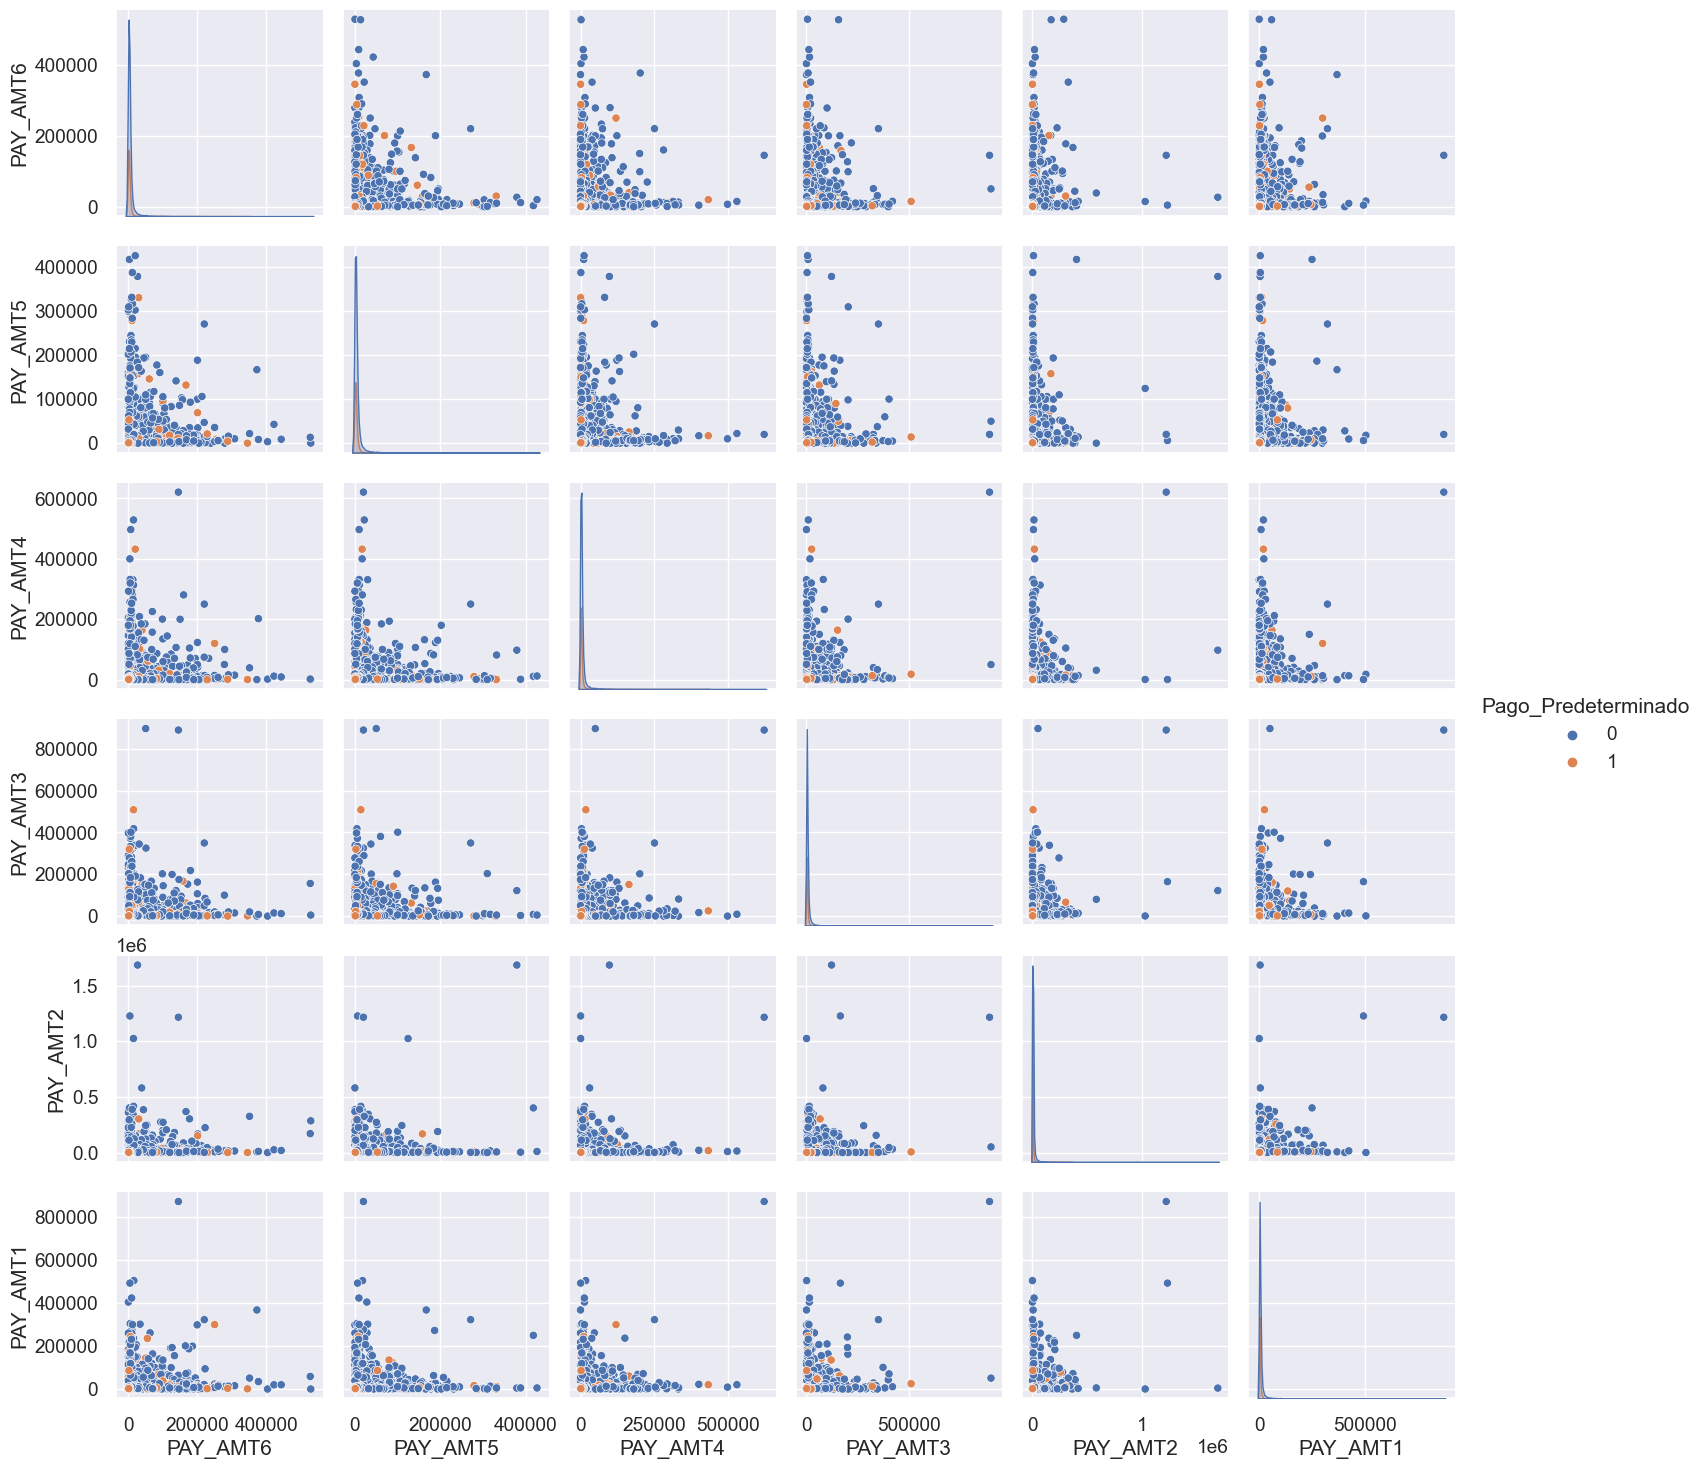

In [34]:
sns.pairplot(data = Total_pago_df, hue='Pago_Predeterminado')

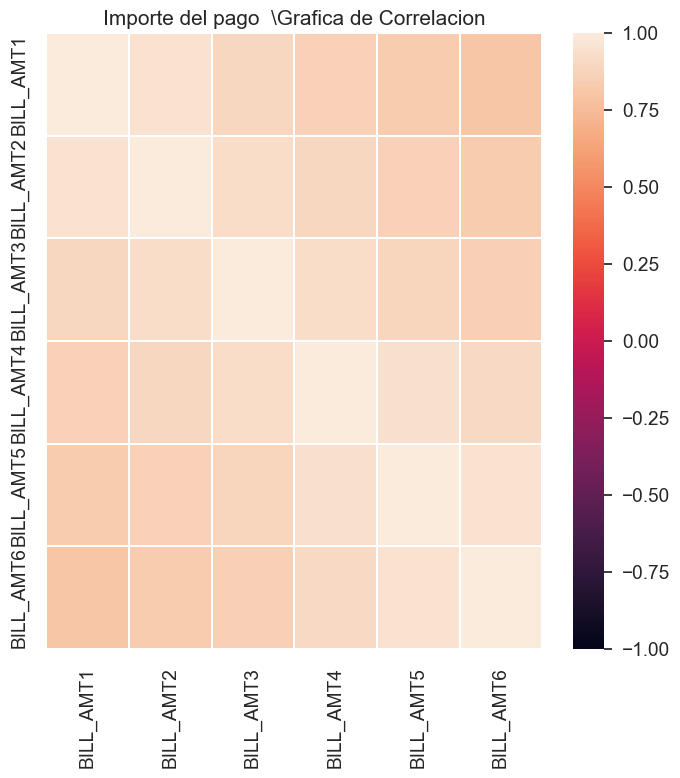

In [35]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Importe del pago  \Grafica de Correlacion')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()


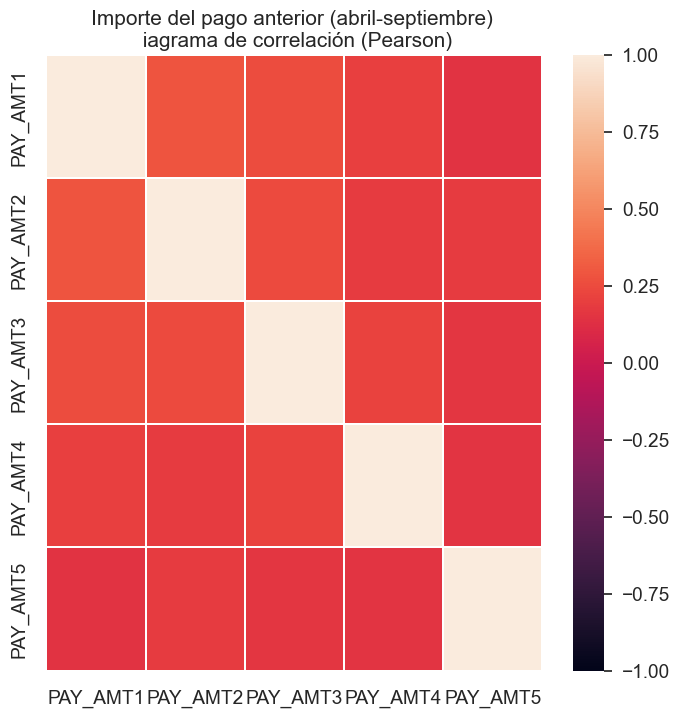

In [48]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Importe del pago anterior (abril-septiembre) \n iagrama de correlación (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

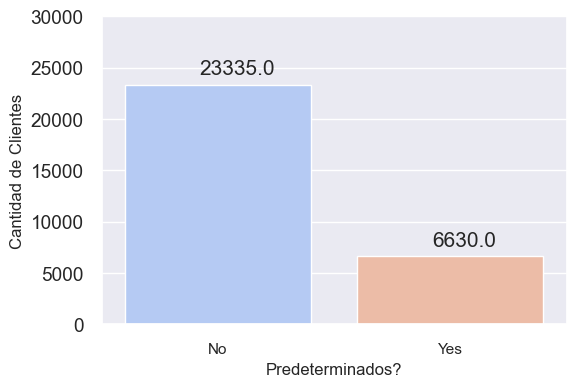

In [37]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Pago_Predeterminado", data=df, palette="coolwarm")

plt.xlabel("Predeterminados?", fontsize= 12)
plt.ylabel("Cantidad de Clientes", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

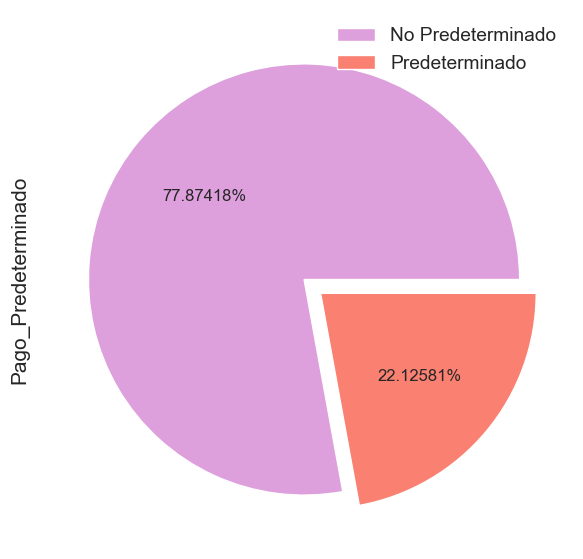

In [38]:
plt.figure(figsize=(7,7))

df['Pago_Predeterminado'].value_counts().plot(kind='pie',labels = ['',''], autopct='%8.5f%%', colors = ['plum','salmon'], explode = [0,0.10], textprops = {"fontsize":12})

plt.legend(labels=['No Predeterminado', 'Predeterminado'])
plt.show()

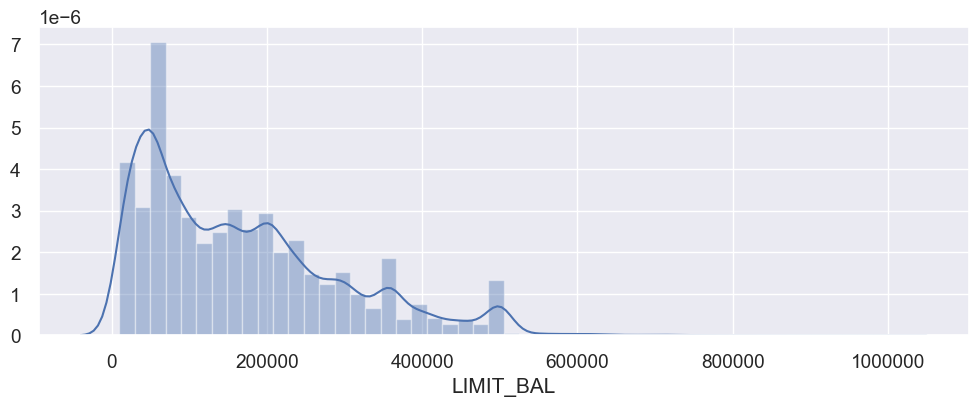

In [39]:
plt.figure(figsize=(12,4))

sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

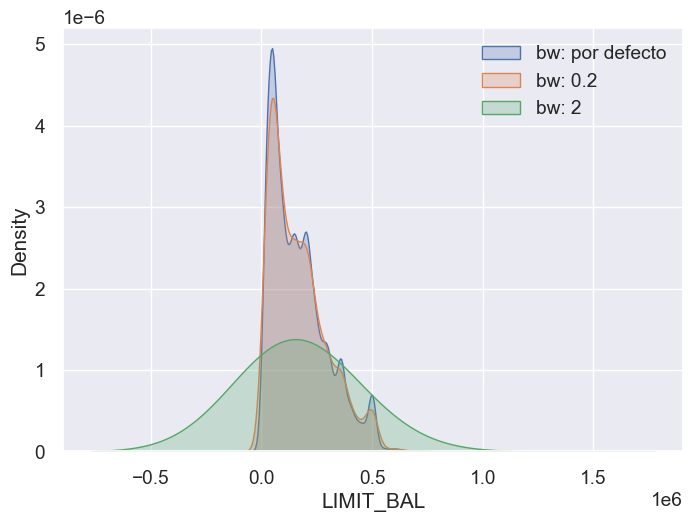

In [40]:
sns.kdeplot(df['LIMIT_BAL'], label="bw: por defecto", shade=True)
sns.kdeplot(df['LIMIT_BAL'], bw=.2, label="bw: 0.2", shade=True)
sns.kdeplot(df['LIMIT_BAL'], bw=2, label="bw: 2", shade=True)
plt.legend();

<AxesSubplot: xlabel='LIMIT_BAL', ylabel='Density'>

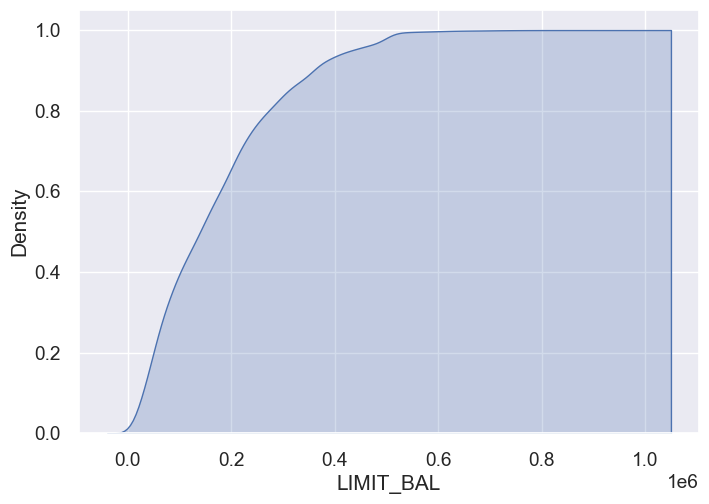

In [41]:
sns.kdeplot(df['LIMIT_BAL'], cumulative =True, shade=True)

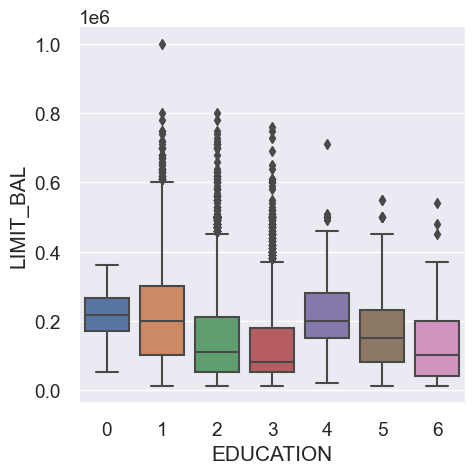

In [76]:
sns.catplot(x="EDUCATION", y="LIMIT_BAL", data=df, kind="box" );

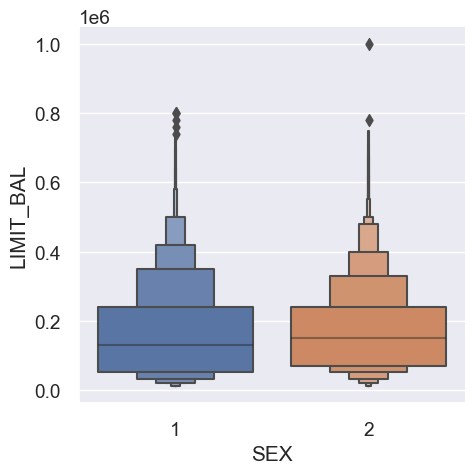

In [86]:
sns.catplot(x="SEX", y="LIMIT_BAL", data=df, kind="boxen" );

#### Hay 29,965 clientes distintos de tarjetas de crédito.

#### El valor promedio de la cantidad de límite de la tarjeta de crédito es 167,442. La desviación estándar es inusualmente grande, siendo el valor máximo de 1M.

#### El nivel educativo es mayoritariamente de posgrado y universitario.

#### La mayoría de los clientes son casados o solteros (menos frecuente el otro estado).

#### La edad promedio es de 35,4 años, con una desviación estándar de 9,4.

#### Como el valor 0 para incumplimiento de pago significa 'no incumplimiento' y el valor 1 significa 'incumplimiento', la media de 0.22 significa que hay un 22% de contratos de tarjetas de crédito o 6,630 clientes que incumplirán el próximo mes y ademas los datos no presentan un gran desequilibrio respecto al valor objetivo

#### el mayor número de tarjetas de crédito son con límite de 50.000 (3,363), seguido de 20.000 (1,975) y 30.000 (1,610).